In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [2]:
import numpy as np

def set_changepoints(df, n_changepoints, changepoint_range):
    """Set changepoints
    Sets changepoints to the dates of changepoints. Either:
    1) We are generating a grid of them.
    2) The user prefers no changepoints be used.
    """
    df = df.sort_values('ds').reset_index(drop=True)
    # Place potential changepoints evenly through first
    # `changepoint_range` proportion of the history
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of observations. Using {}.'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = np.linspace(0,
                                 hist_size - 1,
                                 n_changepoints + 1).round().astype(np.int)
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

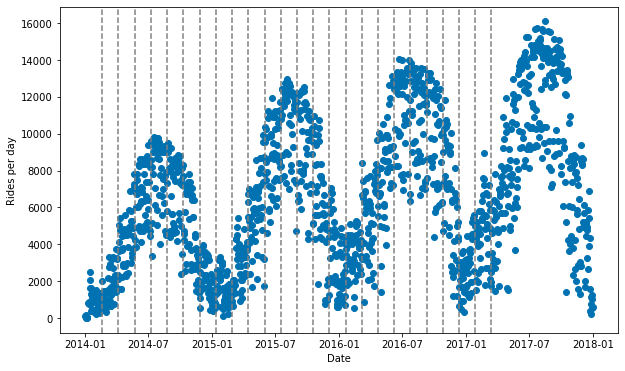

In [3]:
changepoints = set_changepoints(df, 25, .8)

plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in changepoints:
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

In [4]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)
forecast = model.predict()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


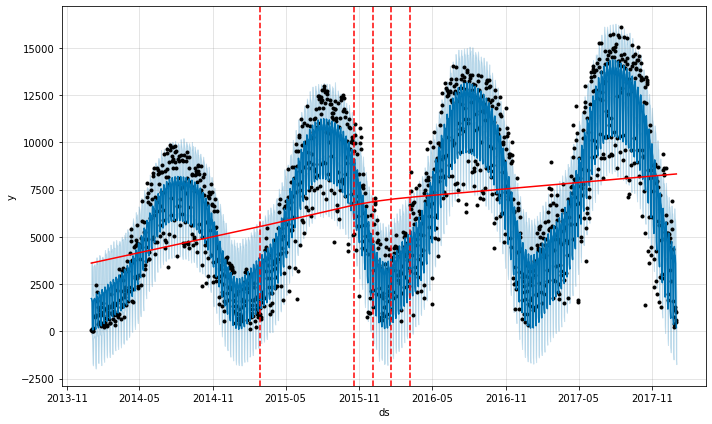

In [5]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [6]:
print(model.params['delta'])

[[-1.79323684e-08 -1.60747569e-07 -2.72344253e-03 -4.29119902e-03
  -5.74359502e-08 -1.95943493e-08  2.39423581e-08  3.99224400e-08
   3.08280300e-02  1.58073660e-07 -2.04451104e-08  2.28463921e-09
  -6.70654988e-03 -9.56743518e-02 -8.63950281e-02 -5.48295844e-02
  -3.19821946e-02 -1.24969134e-05 -2.17687237e-05 -2.32544199e-09
  -9.75395931e-09 -2.26544119e-08 -5.42697251e-08 -8.86291306e-09
  -6.77990839e-08]]


In [7]:
ylims = fig.gca().get_ylim()

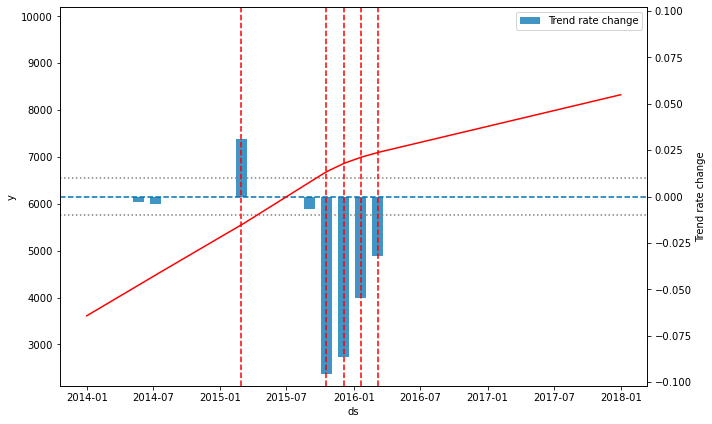

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'k'
add_changepoints_to_plot(ax1, model, forecast, trend=True)
ax1.set_xlabel('ds')
ax1.set_ylabel('y', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(ylims[0] + 5000, ylims[1] - 7000)
ax1.grid(False)

ax2 = ax1.twinx()

color = '#0072B2'
ax2.set_ylabel('Trend rate change')
ax2.bar(changepoints, model.params['delta'][0], width=30, color=color, alpha=.75, label='Trend rate change')
ax2.tick_params(axis='y', labelcolor='k')
ax2.axhline(y=0, c=color, ls='--')
ax2.axhline(y=.01, c='gray', ls=':')
ax2.axhline(y=-.01, c='gray', ls=':')
ax2.set_ylim(top=-ax2.get_ylim()[0], bottom=ax2.get_ylim()[0])

ax2.legend()

fig.tight_layout()
ax1.set_zorder(1)
ax1.patch.set_visible(False)
plt.show()

In [9]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                n_changepoints=5)

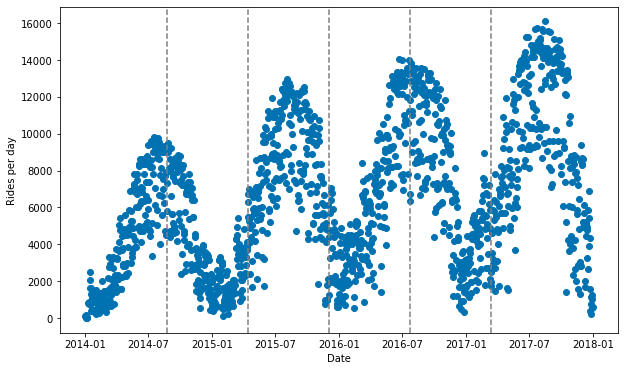

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 5, .8):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

In [11]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_range=.5)

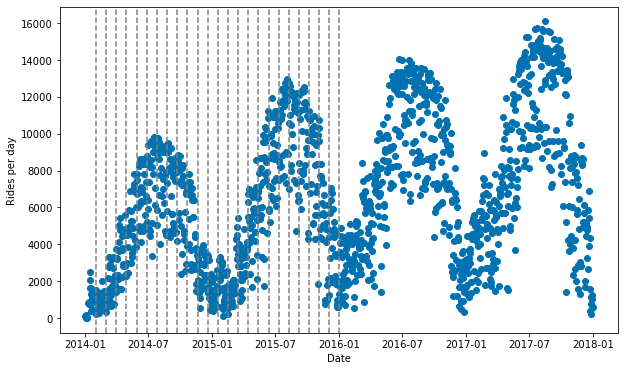

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 25, .5):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


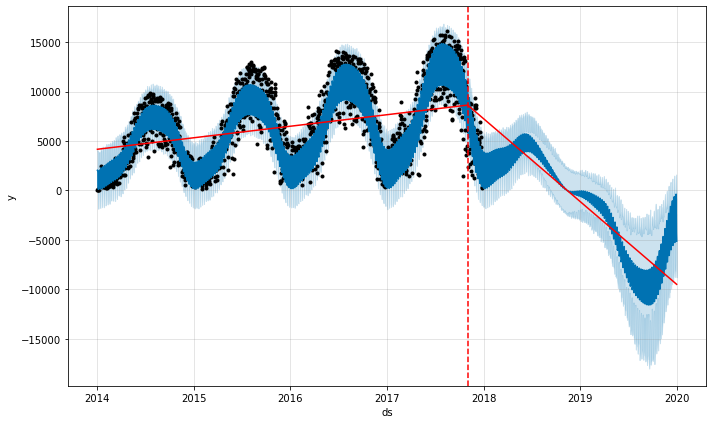

In [13]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoints=['2017-11-01'],
                changepoint_prior_scale=50)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


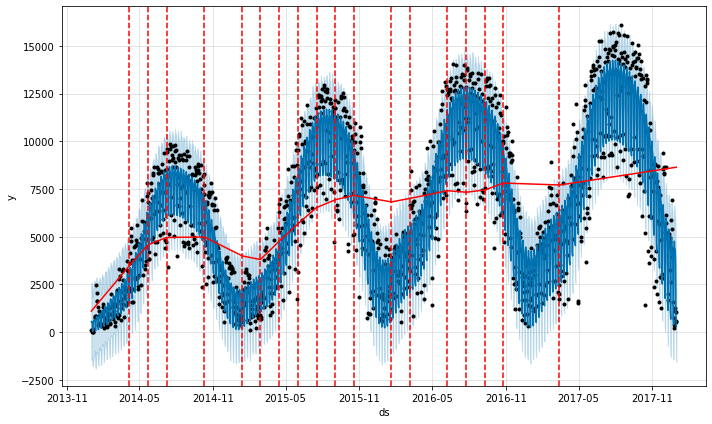

In [14]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=1)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


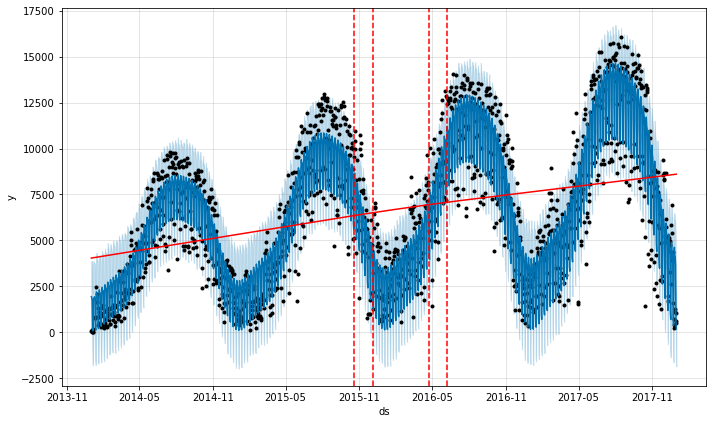

In [15]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=.007)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [16]:
df = pd.read_csv('../data/instagram_jamesrodriguez10.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

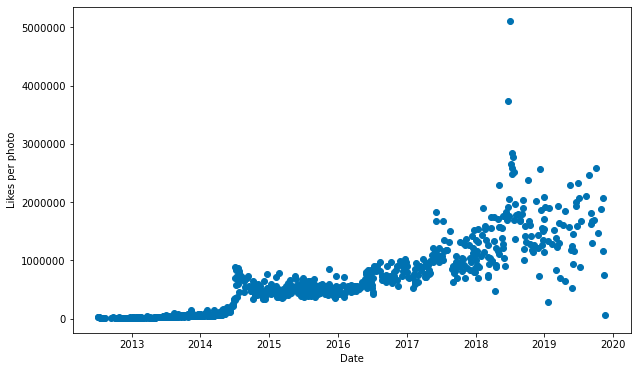

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [18]:
wc_2014 = pd.DataFrame({'holiday': 'World Cup 2014',
                        'ds': pd.to_datetime(['2014-06-12']),
                        'lower_window': 0,
                        'upper_window': 31})
wc_2018 = pd.DataFrame({'holiday': 'World Cup 2018',
                        'ds': pd.to_datetime(['2018-06-14']),
                        'lower_window': 0,
                        'upper_window': 31})
signing = pd.DataFrame({'holiday': 'Bayern Munich',
                        'ds': pd.to_datetime(['2017-07-11']),
                        'lower_window': 0,
                        'upper_window': 14})

special_events = pd.concat([wc_2014, wc_2018, signing])

In [19]:
changepoints = ['2014-06-12',
                '2014-07-13',
                '2017-07-11',
                '2017-07-31',
                '2018-06-14',
                '2018-07-15']

In [20]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


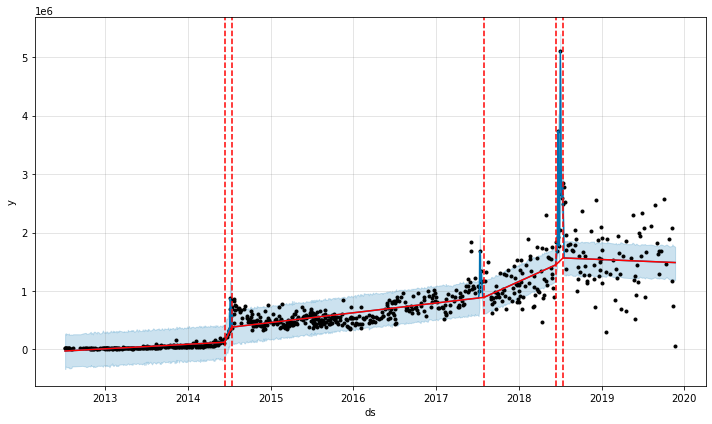

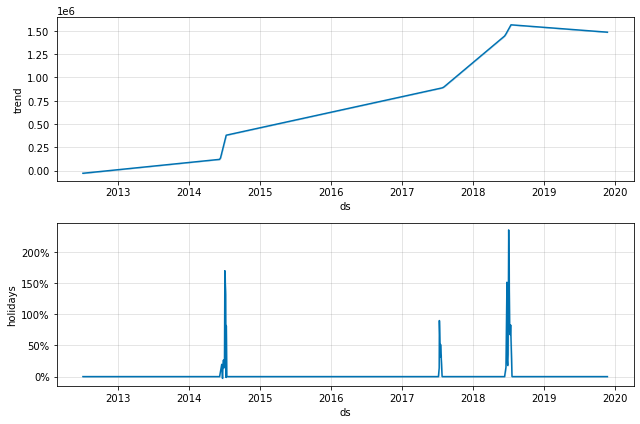

In [21]:
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [22]:
import numpy as np

def set_changepoints(df, n_changepoints=25, changepoint_range=.8):
    df = df.sort_values('ds').reset_index(drop=True)
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of '+
              'observations. Using {}.'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = (np.linspace(0,
                                  hist_size - 1,
                                  n_changepoints + 1).
                      round().astype(np.int))
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

In [23]:
changepoints = set_changepoints(df, 5, .8)
new_changepoints = pd.Series(pd.to_datetime(['2014-05-02',
                                             '2014-08-25',
                                             '2017-07-31',
                                             '2018-06-14', 
                                             '2018-06-04',
                                             '2018-07-03']))
changepoints = changepoints.append(new_changepoints)
changepoints = changepoints.sort_values().reset_index(drop=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


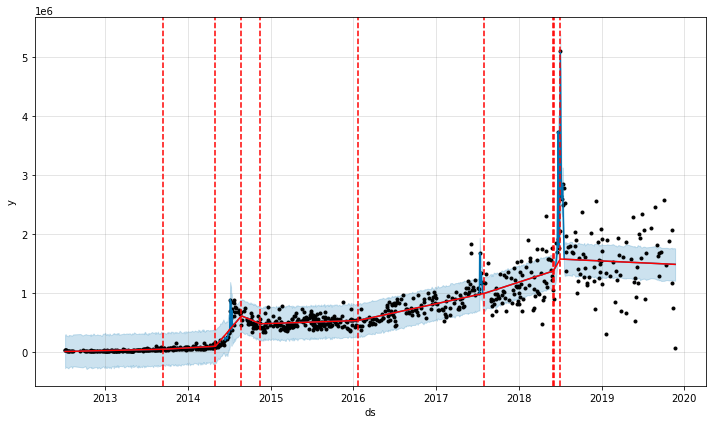

In [24]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()